<a href="https://colab.research.google.com/github/ronaknavadiya/pytorch-projects-practice-/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets --quiet
import opendatasets as od
dataset_url = "https://www.kaggle.com/datasets/andrewmvd/animal-faces"
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ronaknavadiya
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/andrewmvd/animal-faces


100%|██████████| 696M/696M [00:03<00:00, 194MB/s]


In [2]:
import torch
from torch import nn
from torch.optim import Adam
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import numpy as np
import os

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)


cuda


Read all the images and split it to train,test and valdiation

In [3]:
image_path = []
labels = []

for i in os.listdir("/content/animal-faces/afhq"):
  for label in os.listdir(f"/content/animal-faces/afhq/{i}"):
    for image in os.listdir(f"/content/animal-faces/afhq/{i}/{label}"):
      image_path.append(f"/content/animal-faces/afhq/{i}/{label}/{image}")
      labels.append(label)


data_df = pd.DataFrame(zip(image_path, labels), columns = ["image_path", "labels"])

# print(data_df['labels'].unique())

data_df.head()


,image_path,labels
0,/content/animal-faces/afhq/train/cat/flickr_ca...,cat
1,/content/animal-faces/afhq/train/cat/pixabay_c...,cat
2,/content/animal-faces/afhq/train/cat/flickr_ca...,cat
3,/content/animal-faces/afhq/train/cat/pixabay_c...,cat
4,/content/animal-faces/afhq/train/cat/pixabay_c...,cat


In [4]:
train = data_df.sample(frac = 0.7)
test = data_df.drop(train.index).sample(frac = 0.5)
val = data_df.drop(train.index).drop(test.index)


print(train.shape, test.shape, val.shape)

(11291, 2) (2420, 2) (2419, 2)


In [5]:
#  encode the labels into number for example dag=0, cat=1 and wild=2  or another sequence

label_encoder = LabelEncoder()
label_encoder.fit(data_df["labels"])


transform = transforms.Compose([
    transforms.Resize([128,128]),
    transforms.ToTensor(),
    transforms.ConvertImageDtype(torch.float)
])

In [6]:
class CustomImageDataset(Dataset):
  def __init__(self, dataframe, transform = None):
    self.dataframe = dataframe
    self.transform = transform
    self.labels = torch.tensor(label_encoder.transform(dataframe["labels"])).to(device)

  def __len__(self):
    return self.dataframe.shape[0]

  def __getitem__(self, index):
    img_path = self.dataframe.iloc[index , 0]
    label = self.labels[index]
    image = Image.open(img_path).convert("RGB")

    if self.transform:
      image = self.transform(image).to(device)

    return image, label



In [7]:
train_dataset = CustomImageDataset(dataframe = train, transform = transform)
test_dataset = CustomImageDataset(dataframe = test, transform = transform)
val_dataset = CustomImageDataset(dataframe = val, transform = transform)

In [8]:
# train_dataset.__len__()
train_dataset.__getitem__(3)
# label_encoder.inverse_transform([1])

(tensor([[[0.3725, 0.3647, 0.3373,  ..., 0.6275, 0.6353, 0.6392],
          [0.3647, 0.3490, 0.3373,  ..., 0.6078, 0.6039, 0.6196],
          [0.3725, 0.3569, 0.3412,  ..., 0.5843, 0.5686, 0.5843],
          ...,
          [0.7804, 0.7333, 0.6588,  ..., 0.4471, 0.4863, 0.4941],
          [0.7608, 0.6745, 0.6039,  ..., 0.4667, 0.4784, 0.4824],
          [0.7490, 0.6627, 0.5961,  ..., 0.4549, 0.4863, 0.4667]],
 
         [[0.3490, 0.3490, 0.3255,  ..., 0.5922, 0.6000, 0.6039],
          [0.3412, 0.3333, 0.3255,  ..., 0.5686, 0.5647, 0.5804],
          [0.3490, 0.3412, 0.3333,  ..., 0.5412, 0.5294, 0.5412],
          ...,
          [0.5451, 0.5098, 0.4549,  ..., 0.5373, 0.5961, 0.6078],
          [0.5451, 0.4706, 0.4118,  ..., 0.5216, 0.5647, 0.5765],
          [0.5412, 0.4667, 0.4118,  ..., 0.4510, 0.5451, 0.5569]],
 
         [[0.2157, 0.2118, 0.1882,  ..., 0.4431, 0.4510, 0.4549],
          [0.2078, 0.1961, 0.1882,  ..., 0.4275, 0.4235, 0.4431],
          [0.2157, 0.2039, 0.1922,  ...,

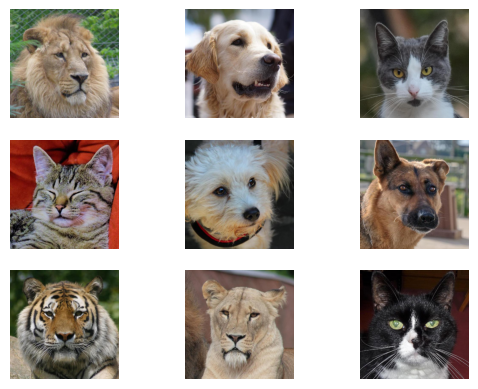

In [9]:
n_rows = 3
n_cols = 3

fig, axisArr = plt.subplots(n_rows, n_cols)
for row in range(n_rows):
  for col in range(n_cols):
    image = Image.open(data_df.sample(n = 1)["image_path"].iloc[0]).convert("RGB")
    axisArr[row,col].imshow(image)
    axisArr[row,col].axis("off")

plt.show()

In [10]:
#  constants

LR = 1e-4
BATCH_SIZE = 16
EPOCHS = 10

In [11]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=True)

Build Model ( example )  -->

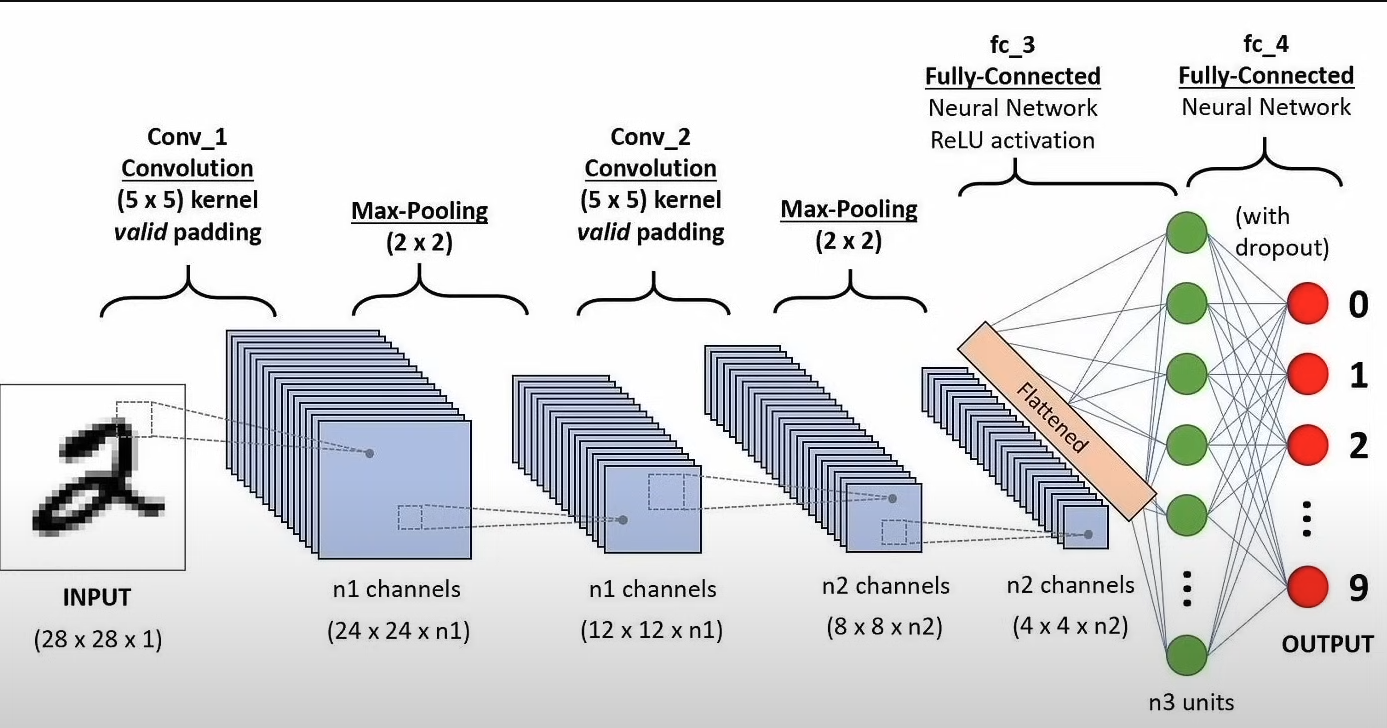

In [12]:
class My_NuralNet(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding= 1)
    self.conv2 = nn.Conv2d(32, 64, kernel_size=3,  padding= 1)
    self.conv3 = nn.Conv2d(64, 128, kernel_size=3 ,  padding= 1)

    self.pooling = nn.MaxPool2d(kernel_size=2, stride=2)  # kernel_size=2 → The pooling window is 2×2.   # stride=2 → The window moves 2 steps each time (no overlap).
    self.relu = nn.ReLU()

    self.flatten = nn.Flatten()
    self.linear = nn.Linear((128*16*16),128)    #( check last relu )
    self.output = nn.Linear(128,len(data_df['labels'].unique()))

  def forward(self, x):
    x = self.conv1(x)  #        (2,128,128)   --> (32,128,128)
    x = self.pooling(x)   #    (32,128,128)   --> (32, 64,64)      (  128/2 = 64 ) 2 cause its define under pooling functiuon
    x = self.relu(x)    #    (32, 64,64) --> (32, 64,64)   (just change value inside the matrix)

    x = self.conv2(x)  # (32, 64,64)   -->  (64,64,64)
    x = self.pooling(x)  # (64,64,64)  --> (64,32,32)
    x = self.relu(x)

    x = self.conv3(x)  # (64,32,32)   -->  (128,32,32)
    x = self.pooling(x)  #(128,32,32)  --> (128,16,16)
    x = self.relu(x)


    x = self.flatten(x)
    x = self.linear(x)
    x = self.output(x)

    return x




In [13]:
model = My_NuralNet().to(device)


In [14]:
from torchsummary import summary
summary(model, input_size=(3,128,128))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
         MaxPool2d-2           [-1, 32, 64, 64]               0
              ReLU-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 64, 64]          18,496
         MaxPool2d-5           [-1, 64, 32, 32]               0
              ReLU-6           [-1, 64, 32, 32]               0
            Conv2d-7          [-1, 128, 32, 32]          73,856
         MaxPool2d-8          [-1, 128, 16, 16]               0
              ReLU-9          [-1, 128, 16, 16]               0
          Flatten-10                [-1, 32768]               0
           Linear-11                  [-1, 128]       4,194,432
           Linear-12                    [-1, 3]             387
Total params: 4,288,067
Trainable params: 4,288,067
Non-trainable params: 0
---------------------------

In [15]:
criterian = nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr = LR)

In [16]:
total_loss_train_plot = []
total_loss_validation_plot = []
total_acc_train_plot = []
total_acc_validation_plot = []


for epoch in range(EPOCHS):
  total_acc__train = 0
  total_loss_train = 0
  total_acc_validation = 0
  total_loss_validation = 0

  for data in train_dataloader:
    inputs, labels = data


    outputs = model(inputs)
    batch_loss = criterian(outputs, labels)
    total_loss_train += batch_loss.item()

    batch_loss.backward()

    batch_acc = (torch.argmax(outputs, axis = 1) == labels).sum().item()
    total_acc__train += batch_acc
    optimizer.step()

    optimizer.zero_grad()

  with torch.no_grad():
    for data in val_dataloader:
      inputs, labels = data
      outputs = model(inputs)
      val_loss = criterian(outputs, labels)
      total_loss_validation += val_loss.item()

      val_acc = (torch.argmax(outputs, axis = 1) == labels).sum().item()
      total_acc_validation += val_acc

  total_loss_train_plot.append(round(total_loss_train/1000, 4))
  total_loss_validation_plot.append(round(total_loss_validation/1000, 4))

  total_acc_train_plot.append(round((total_acc__train/train_dataset.__len__())*100, 4))
  total_acc_validation_plot.append(round((total_acc_validation/val_dataset.__len__())*100, 4))

  print(f'''Epoch {epoch + 1 } / {EPOCHS} , Train Loss : {round(total_loss_train/1000,4)} , Train accuracy {round((total_acc__train/train_dataset.__len__())*100,4)} ,
         Validation Loss  {round(total_loss_validation/1000,4)}  Validation Accuracy {round((total_acc_validation/val_dataset.__len__())*100, 4)} ''')

Epoch 1 / 10 , Train Loss : 0.3193 , Train accuracy 81.534 ,
         Validation Loss  0.0402  Validation Accuracy 89.7892 
Epoch 2 / 10 , Train Loss : 0.1347 , Train accuracy 93.1007 ,
         Validation Loss  0.0286  Validation Accuracy 93.0136 
Epoch 3 / 10 , Train Loss : 0.0839 , Train accuracy 95.6248 ,
         Validation Loss  0.0211  Validation Accuracy 95.246 
Epoch 4 / 10 , Train Loss : 0.059 , Train accuracy 96.9888 ,
         Validation Loss  0.022  Validation Accuracy 95.0393 
Epoch 5 / 10 , Train Loss : 0.0438 , Train accuracy 97.8567 ,
         Validation Loss  0.0351  Validation Accuracy 92.3936 
Epoch 6 / 10 , Train Loss : 0.0321 , Train accuracy 98.5475 ,
         Validation Loss  0.0215  Validation Accuracy 95.1633 
Epoch 7 / 10 , Train Loss : 0.0232 , Train accuracy 98.8221 ,
         Validation Loss  0.0177  Validation Accuracy 96.3208 
Epoch 8 / 10 , Train Loss : 0.0154 , Train accuracy 99.3889 ,
         Validation Loss  0.0208  Validation Accuracy 95.742 
Epoch

In [19]:
with torch.no_grad():
  total_acc_test = 0
  total_loss_test = 0
  for data in test_dataloader:
    inputs, labels = data
    outputs = model(inputs)

    test_loss = criterian(outputs, labels)
    total_loss_test += test_loss.item()

    acc = (torch.argmax(outputs, axis = 1) == labels).sum().item()
    total_acc_test += acc

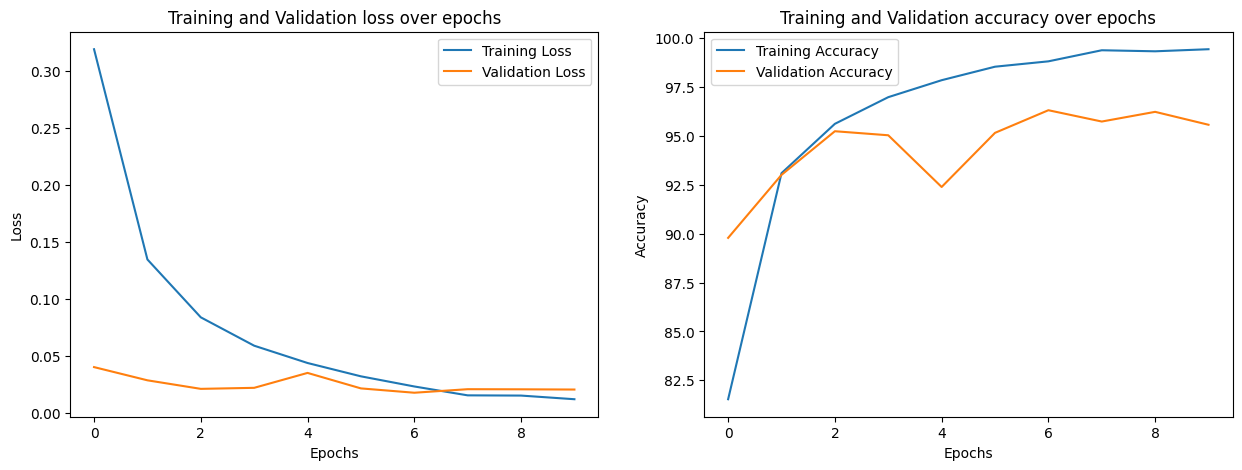

In [26]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(15,5))

# axs = axs.ravel()

axs[0].plot(total_loss_train_plot, label = 'Training Loss')
axs[0].plot(total_loss_validation_plot, label = 'Validation Loss')
axs[0].set_title('Training and Validation loss over epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()


axs[1].plot(total_acc_train_plot, label = 'Training Accuracy')
axs[1].plot(total_acc_validation_plot, label = 'Validation Accuracy')
axs[1].set_title('Training and Validation accuracy over epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend()


plt.show()

Test model

In [41]:
# 1. Read Image
# 2. Transform image using our transform function
# 3. predict class through model
# 4. Inerse transform class using label encoder


def predict_image( img_path):
  image = Image.open(img_path).convert('RGB')
  image = transform(image).to(device)
  print(image.shape)

  prediction = model(image.unsqueeze(0))
  print(prediction)
  prediction = torch.argmax(prediction, axis=1).item()
  prediction = label_encoder.inverse_transform([prediction])
  return prediction


predict_image("/content/FELV-cat.jpg")


torch.Size([3, 128, 128])
tensor([[ 4.6407, -5.1917,  0.3782]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


array(['cat'], dtype=object)